In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


C:\Users\Yogita\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
#importing the dataset
dataset = pd.read_csv("kidney_disease.csv")
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
import seaborn as sns

In [4]:
dataset.shape

(400, 26)

In [5]:
# dropping id column
dataset.drop('id', axis = 1, inplace = True)

In [6]:
dataset['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [7]:
# rename column names to make it more user-friendly

dataset.columns = ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Red_Blood_Cells', 'Pus_Cell',
              'Pus_Cell_Clumps', 'Bacteria', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
              'Potassium', 'Haemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
              'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite', 'Peda_Edema',
              'Aanemia', 'Class']

In [8]:
dataset.head()


,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
dataset.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
# Describing some of the stats of the data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
Blood_Pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
Specific_Gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
Albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
Sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
Blood_Glucose_Random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
Blood_Urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
Serum_Creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
Sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
Potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [12]:
# converting necessary columns to numerical type

dataset['Packed_Cell_Volume'] = pd.to_numeric(dataset['Packed_Cell_Volume'], errors='coerce')
dataset['White_Blood_Cell_Count'] = pd.to_numeric(dataset['White_Blood_Cell_Count'], errors='coerce')
dataset['Red_Blood_Cell_Count'] = pd.to_numeric(dataset['Red_Blood_Cell_Count'], errors='coerce')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [14]:
def kde(col):
    grid = sns.FacetGrid(dataset, hue="Class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

In [15]:
# Extracting categorical and numerical columns

cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")



Red_Blood_Cells has [nan 'normal' 'abnormal'] values

Pus_Cell has ['normal' 'abnormal' nan] values

Pus_Cell_Clumps has ['notpresent' 'present' nan] values

Bacteria has ['notpresent' 'present' nan] values

Hypertension has ['yes' 'no' nan] values

Diabetes_Mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

Coronary_Artery_Disease has ['no' 'yes' '\tno' nan] values

Appetite has ['good' 'poor' nan] values

Peda_Edema has ['no' 'yes' nan] values

Aanemia has ['no' 'yes' nan] values

Class has ['ckd' 'ckd\t' 'notckd'] values



In [17]:
# replace incorrect values

dataset['Diabetes_Mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataset['Coronary_Artery_Disease'] = dataset['Coronary_Artery_Disease'].replace(to_replace = '\tno', value='no')

dataset['Class'] = dataset['Class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [18]:
dataset['Class'] = dataset['Class'].map({'ckd': 0, 'not ckd': 1})
dataset['Class'] = pd.to_numeric(dataset['Class'], errors='coerce')

In [19]:
cols = ['Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

Diabetes_Mellitus has ['yes' 'no' nan] values

Coronary_Artery_Disease has ['no' 'yes' nan] values

Class has [0 1] values



In [20]:
dataset.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Peda_Edema', 'Aanemia', 'Class'],
      dtype='object')

In [21]:
# checking for null values

dataset.isna().sum().sort_values(ascending = False)

Red_Blood_Cells            152
Red_Blood_Cell_Count       131
White_Blood_Cell_Count     106
Potassium                   88
Sodium                      87
Packed_Cell_Volume          71
Pus_Cell                    65
Haemoglobin                 52
Sugar                       49
Specific_Gravity            47
Albumin                     46
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Blood_Pressure              12
Age                          9
Bacteria                     4
Pus_Cell_Clumps              4
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Peda_Edema                   1
Aanemia                      1
Class                        0
dtype: int64

In [22]:
dataset[num_cols].isnull().sum()

Age                         9
Blood_Pressure             12
Specific_Gravity           47
Albumin                    46
Sugar                      49
Blood_Glucose_Random       44
Blood_Urea                 19
Serum_Creatinine           17
Sodium                     87
Potassium                  88
Haemoglobin                52
Packed_Cell_Volume         71
White_Blood_Cell_Count    106
Red_Blood_Cell_Count      131
dtype: int64

In [23]:
dataset[cat_cols].isnull().sum()

Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Peda_Edema                   1
Aanemia                      1
Class                        0
dtype: int64

In [24]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [25]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [26]:
dataset[num_cols].isnull().sum()

Age                       0
Blood_Pressure            0
Specific_Gravity          0
Albumin                   0
Sugar                     0
Blood_Glucose_Random      0
Blood_Urea                0
Serum_Creatinine          0
Sodium                    0
Potassium                 0
Haemoglobin               0
Packed_Cell_Volume        0
White_Blood_Cell_Count    0
Red_Blood_Cell_Count      0
dtype: int64

In [27]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('Red_Blood_Cells')
random_value_imputation('Pus_Cell')

for col in cat_cols:
    impute_mode(col)

In [28]:
dataset[cat_cols].isnull().sum()

Red_Blood_Cells            0
Pus_Cell                   0
Pus_Cell_Clumps            0
Bacteria                   0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Peda_Edema                 0
Aanemia                    0
Class                      0
dtype: int64

In [29]:
for col in cat_cols:
    print(f"{col} has {dataset[col].nunique()} categories\n")

Red_Blood_Cells has 2 categories

Pus_Cell has 2 categories

Pus_Cell_Clumps has 2 categories

Bacteria has 2 categories

Hypertension has 2 categories

Diabetes_Mellitus has 2 categories

Coronary_Artery_Disease has 2 categories

Appetite has 2 categories

Peda_Edema has 2 categories

Aanemia has 2 categories

Class has 2 categories



In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [31]:
dataset.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Peda_Edema,Aanemia,Class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,92.0,...,38.0,6000.0,3.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


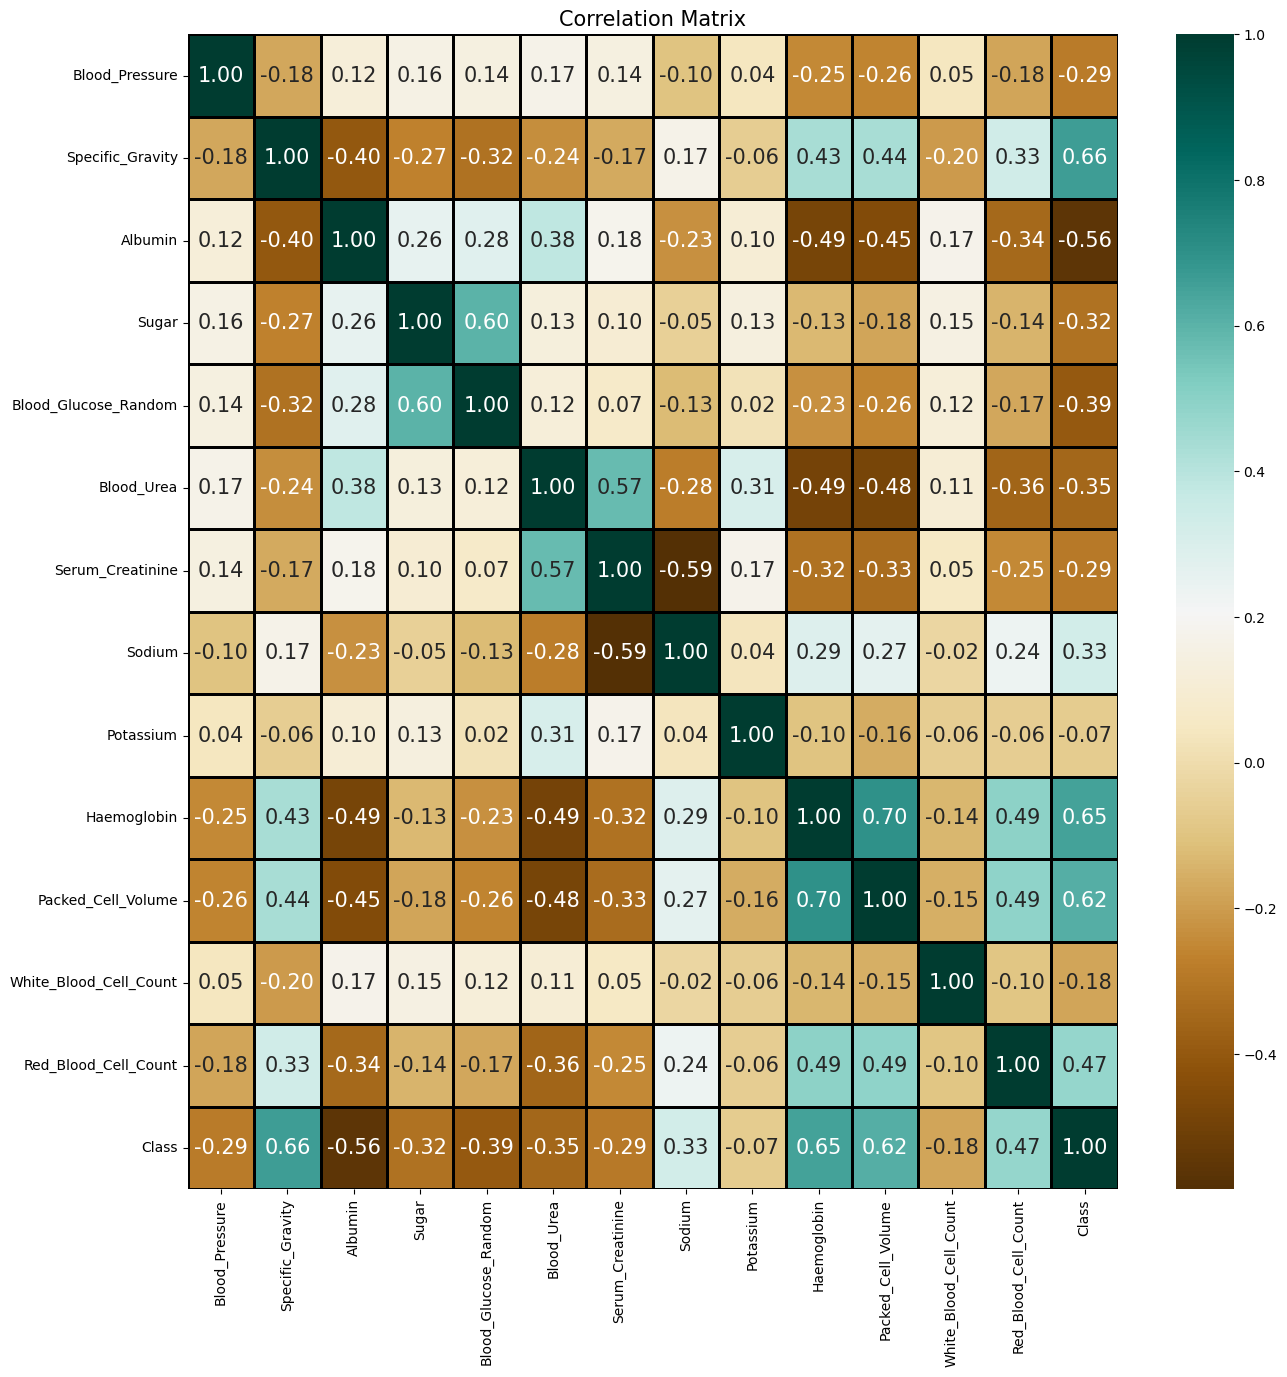

In [32]:
plt.figure(figsize=(15,15))
corr_matrix = dataset[[ 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Class']].corr()
sns.heatmap(corr_matrix, cmap='BrBG',fmt='0.2f',  linewidths=2, linecolor='k',annot=True, annot_kws={"size": 15})
plt.title('Correlation Matrix', fontsize=15)
plt.savefig("cor.jpg", dpi=300)
plt.show()


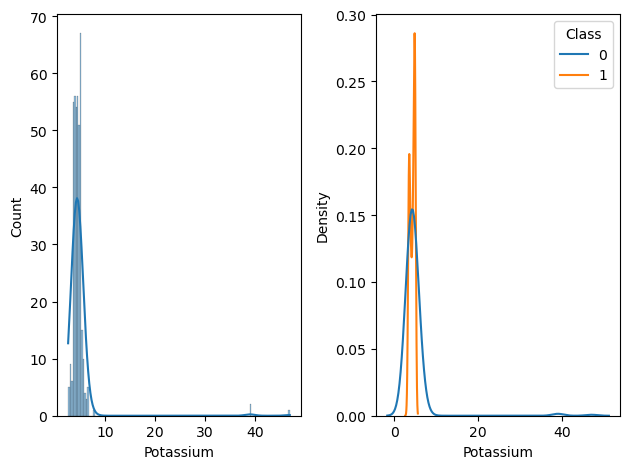

In [33]:
plt.subplot(1,2,1)
sns.histplot(data = dataset, x = "Potassium", kde='True')
#plt.xlabel("(a)")
plt.subplot(1,2,2)
sns.kdeplot(data=dataset, x="Potassium", hue="Class")
plt.tight_layout()
plt.savefig("pot.jpg", dpi=300)

C:\Users\Yogita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


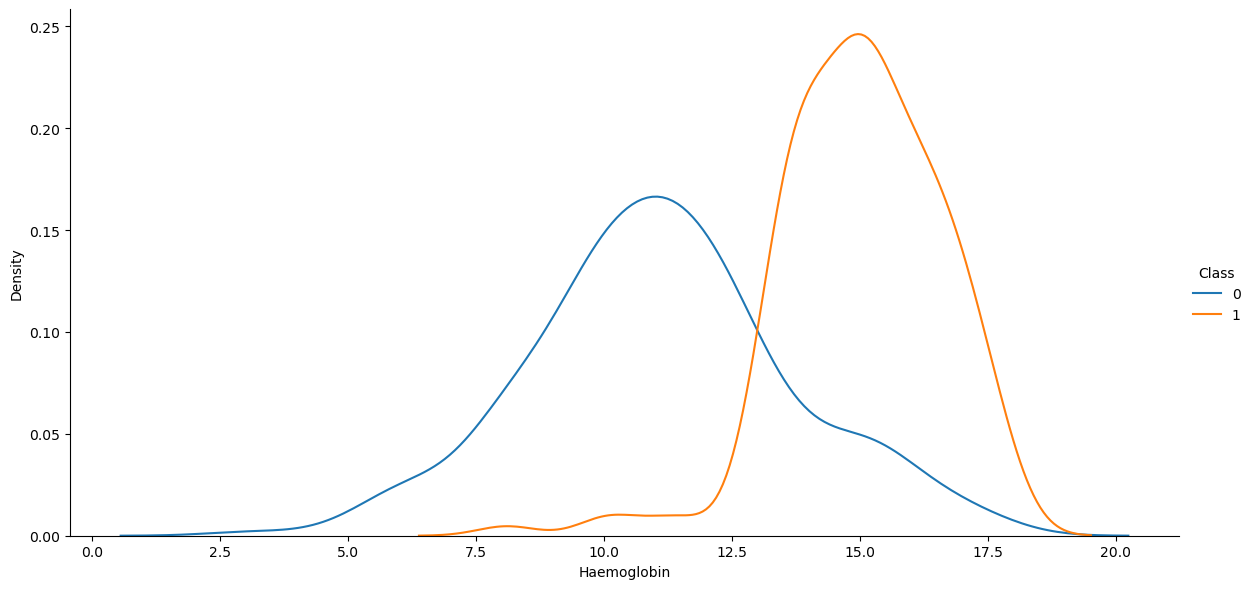

In [34]:
kde("Haemoglobin")
plt.savefig("ham.jpg", dpi=300)

C:\Users\Yogita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


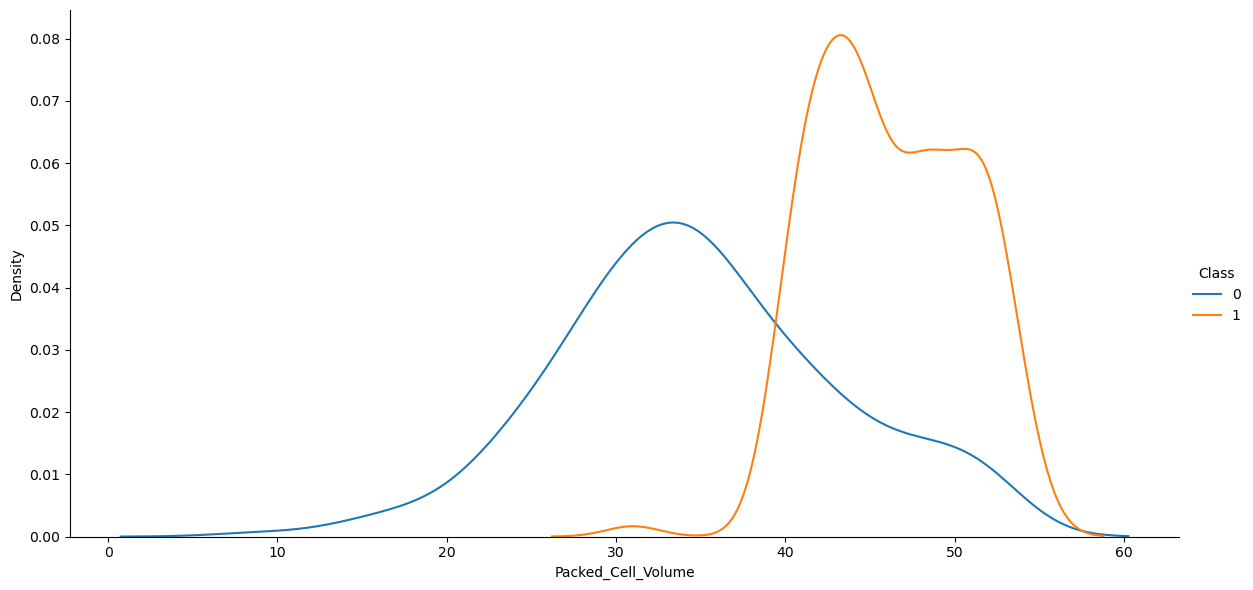

In [35]:
kde('Packed_Cell_Volume');

C:\Users\Yogita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


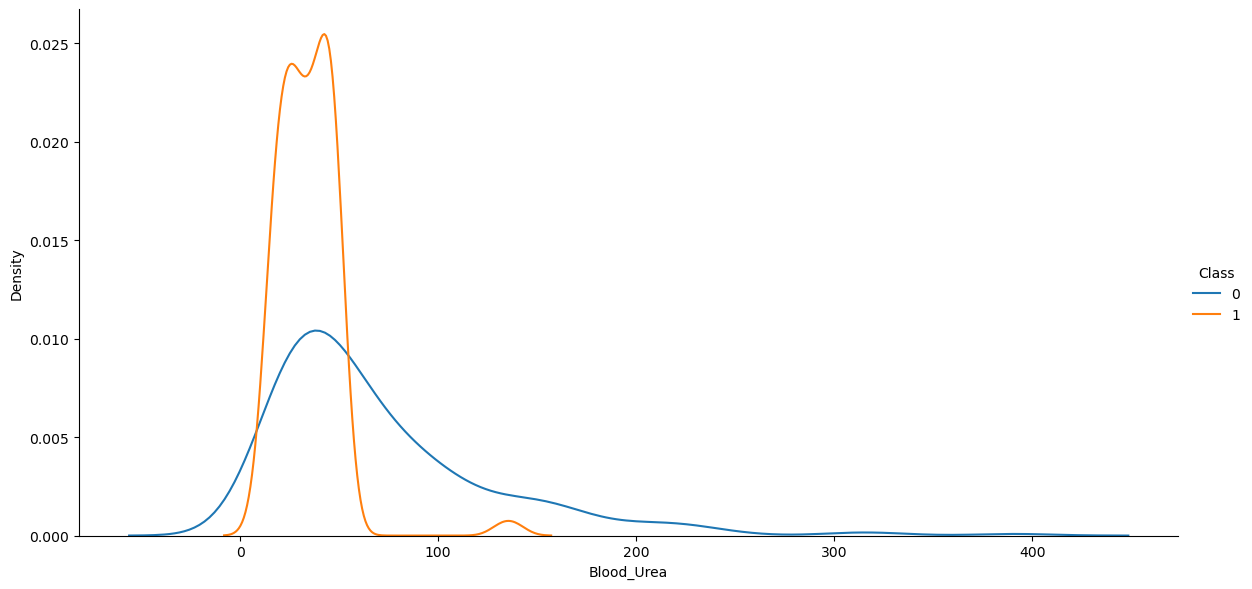

In [36]:
kde('Blood_Urea')

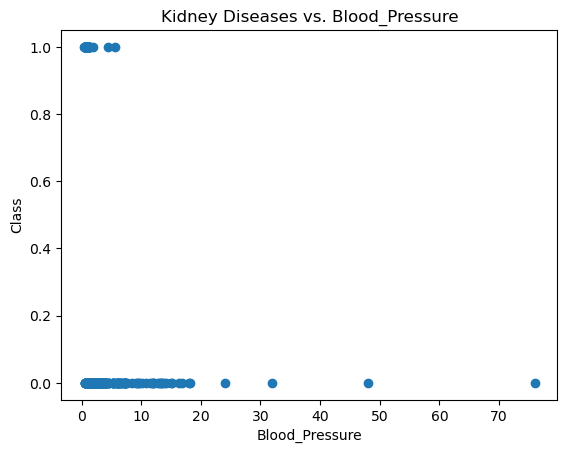

In [37]:
plt.scatter(dataset['Serum_Creatinine'], dataset['Class'])
plt.xlabel('Blood_Pressure')
plt.ylabel('Class')
plt.title('Kidney Diseases vs. Blood_Pressure')
plt.show()

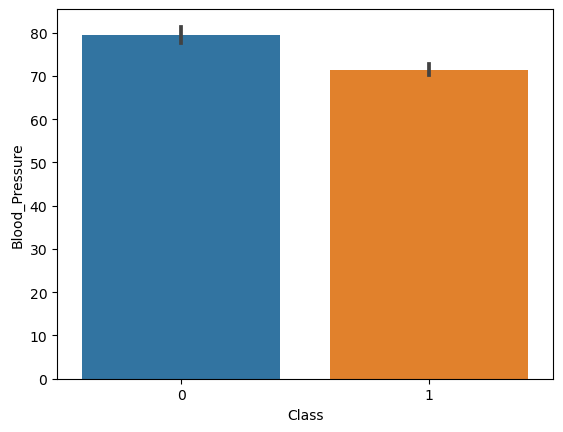

In [38]:
sns.barplot(x='Class', y='Blood_Pressure', data=dataset)
#plt.xlabel('Extracurricular Activities')
#plt.ylabel('Average Performance Index')
#plt.title('Performance Index by Extracurricular Activities')
plt.show()

<Axes: xlabel='Class', ylabel='Haemoglobin'>

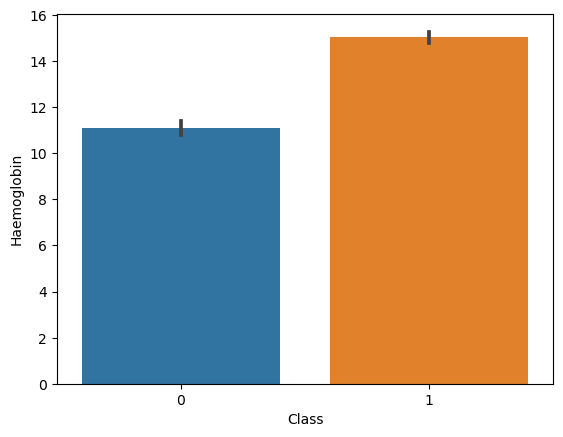

In [39]:
sns.barplot(x='Class', y='Haemoglobin', data=dataset)

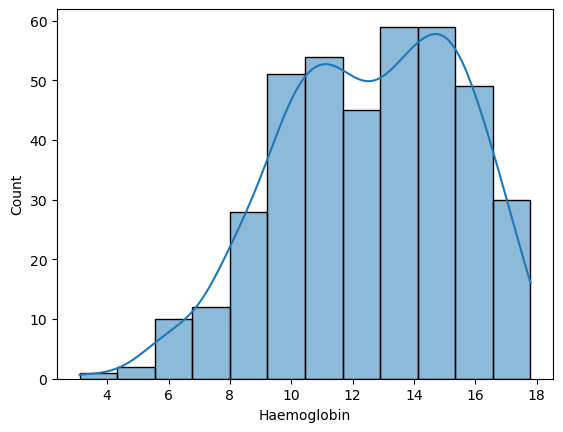

In [40]:
sns.histplot(data = dataset, x = "Haemoglobin", kde = True)
plt.savefig("hemhist.jpg", dpi=300)

C:\Users\Yogita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


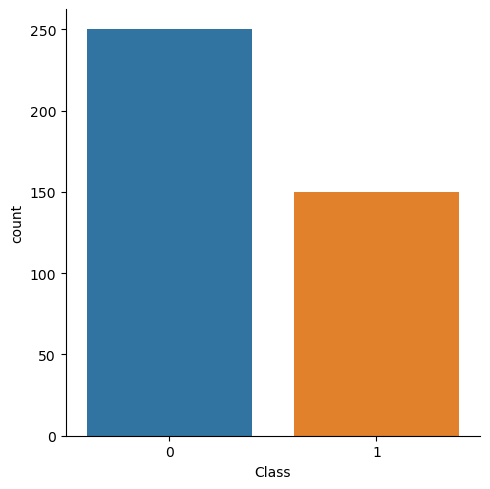

In [41]:
sns.catplot(x='Class',data=dataset,kind='count')
plt.show()

In [42]:
ind_col = [col for col in dataset.columns if col != 'Class']
dep_col = 'Class'

X = dataset[ind_col]
y = dataset[dep_col]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [44]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8071428571428572
Test Accuracy of KNN is 0.6333333333333333 

Confusion Matrix :- 
[[46 26]
 [18 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.64      0.68        72
           1       0.54      0.62      0.58        48

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.65      0.63      0.64       120



In [45]:
from sklearn.preprocessing import StandardScaler
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {accuracy} \n")

Training Accuracy of KNN is 0.971875
Test Accuracy of KNN is 0.9625 



In [46]:
# Make predictions on the test set
y_pred_proba = knn.predict_proba(X_test)

# Calculate the log loss
log_loss_KNN = log_loss(y_test, y_pred_proba)

print("Log Loss KNN:", log_loss_KNN)

Log Loss KNN: 0.4846101132265289


In [47]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9625 

Confusion Matrix :- 
[[50  2]
 [ 1 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [61]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\Yogita\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yogita\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yogita\anaconda3\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Yogita\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Yogita\anaconda3\Lib\sit

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                              min_samples_leaf=5,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
0.978125


In [50]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9375
Test Accuracy of Decision Tree Classifier is 0.9625 

Confusion Matrix :- 
[[49  3]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [51]:
# Make predictions on the test set
y_pred_proba = dtc.predict_proba(X_test)

# Calculate the log loss
log_loss_DT = log_loss(y_test, y_pred_proba)

print("Log Loss Decision Tree:", log_loss_DT)

Log Loss Decision Tree: 0.11579882459762887


In [52]:
# Histogram Boosting
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)

# Calculate predictions on the test set
y_pred = hgb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train,hgb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {accuracy} \n")

print(report)

Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9875 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [53]:
# Make predictions on the test set
y_pred_proba = hgb.predict_proba(X_test)

# Calculate the log loss
log_loss_HB = log_loss(y_test, y_pred_proba)

print("Log Loss Histogram Boosting:", log_loss_HB)

Log Loss Histogram Boosting: 0.013760109131525469


In [63]:
# Random Forest
#rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf=RandomForestClassifier(n_estimators = 100)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[52  0]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [64]:
# Make predictions on the test set
y_pred_proba = rd_clf.predict_proba(X_test)

# Calculate the log loss
log_loss_RF = log_loss(y_test, y_pred_proba)

print("Log Loss Random Forest:", log_loss_RF)

Log Loss Random Forest: 0.0352854569031813


In [65]:
# Gradient Boost
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9875 

Confusion Matrix :- 
[[51  1]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [66]:
# Make predictions on the test set
y_pred_proba = gb.predict_proba(X_test)

# Calculate the log loss
log_loss_GB = log_loss(y_test, y_pred_proba)

print("Log Loss Gradient Boost:", log_loss_GB)

Log Loss Gradient Boost: 0.028107772186825607


In [67]:
# XG Boost
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9875 

Confusion Matrix :- 
[[51  1]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [68]:
# Make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)

# Calculate the log loss
log_loss_XGB = log_loss(y_test, y_pred_proba)

print("Log Loss for XG Boost:", log_loss_XGB)

Log Loss for XG Boost: 0.018403096815234127


Test Accuracy of KNN is 0.9625
Test Accuracy of Decision Tree is 0.9625
Test Accuracy of Random Forest is 1.0
Test Accuracy of Gradient Boosting is 0.9875
Test Accuracy of XGBoost is 0.9875
Test Accuracy of Histogram Boosting is 0.9875


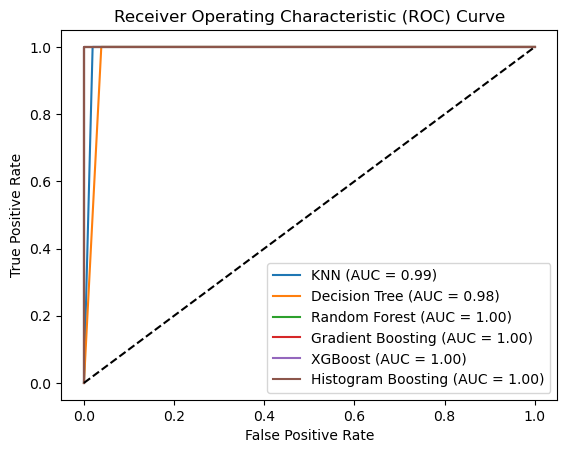

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier


# Create the classifiers
classifiers = [knn, dtc, rd_clf, gb, xgb, hgb]
classifier_names = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Histogram Boosting']

# Calculate and display the test accuracy for each classifier
for classifier, name in zip(classifiers, classifier_names):
    if isinstance(classifier, HistGradientBoostingClassifier):
        y_scores = classifier.predict_proba(X_test)[:, 1]
    else:
        y_scores = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    accuracy = accuracy_score(y_test, classifier.predict(X_test))
    print(f"Test Accuracy of {name} is {accuracy}")
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Add labels and title
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the plot
plt.legend()
plt.show()



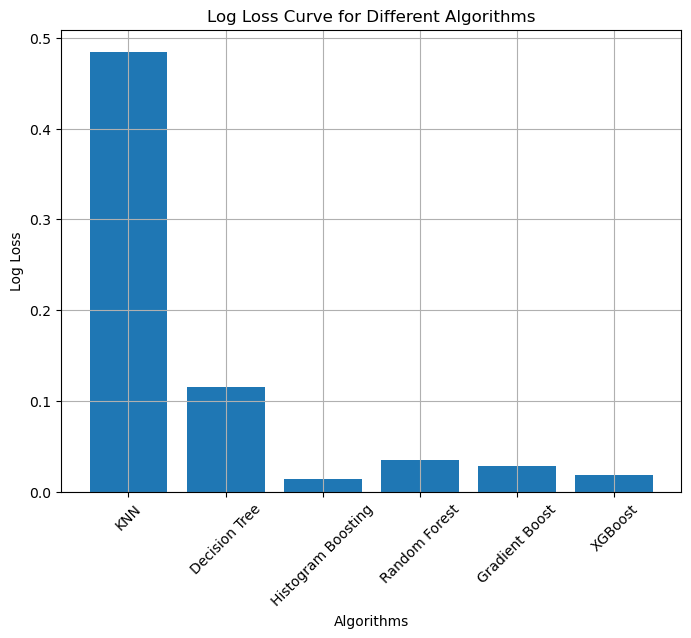

In [70]:
# Log loss values for each algorithm
log_loss_values = [log_loss_KNN, log_loss_DT, log_loss_HB, log_loss_RF, log_loss_GB, log_loss_XGB]

# Algorithm names
algorithms = ['KNN', 'Decision Tree', 'Histogram Boosting', 'Random Forest', 'Gradient Boost', 'XGBoost']

# Plotting the log loss curve
plt.figure(figsize=(8, 6))
plt.bar(algorithms, log_loss_values)
plt.xlabel('Algorithms')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


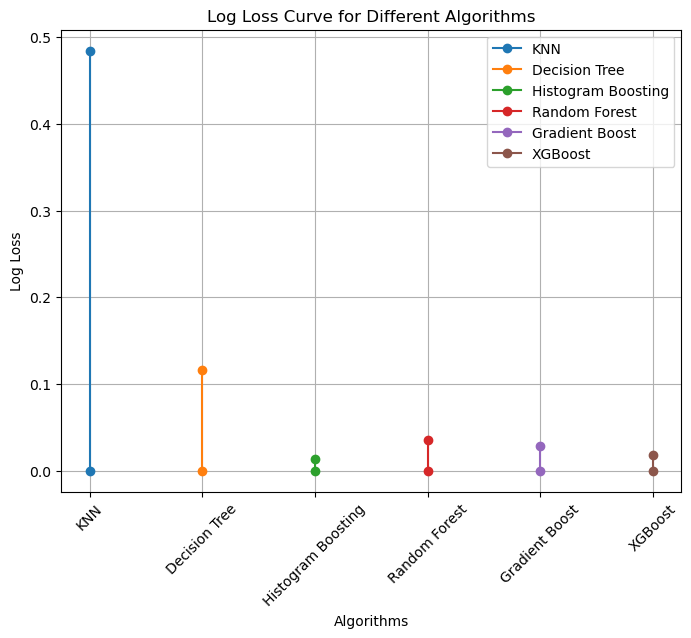

In [72]:
# Log loss values for each algorithm
log_loss_values = [log_loss_KNN, log_loss_DT, log_loss_HB, log_loss_RF, log_loss_GB, log_loss_XGB]

# Algorithm names
algorithms = ['KNN', 'Decision Tree', 'Histogram Boosting', 'Random Forest', 'Gradient Boost', 'XGBoost']

# Plotting the log loss curve
plt.figure(figsize=(8, 6))
for i in range(len(algorithms)):
    plt.plot([i, i], [0, log_loss_values[i]], marker='o', linestyle='-', label=algorithms[i])

plt.xlabel('Algorithms')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve for Different Algorithms')
plt.xticks(range(len(algorithms)), algorithms, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yogita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

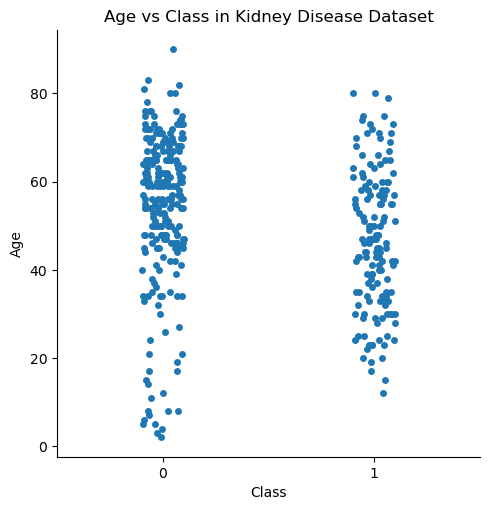

In [78]:
# Create the catplot (boxplot) for age vs class
plt.figure(figsize=(8, 6))
sns.catplot(x="Class", y="Age", data=dataset)
plt.title("Age vs Class in Kidney Disease Dataset")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

In [80]:
# List of clinical parameters (features) to plot
clinical_parameters = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia']

# Create individual catplots for each clinical parameter vs class
for param in clinical_parameters:
    plt.figure(figsize=(8, 6))
    sns.catplot(x="Class", y=param, kind="box", data=dataset)
    plt.title(f"{param} vs Class in Kidney Disease Dataset")
    plt.xlabel("Class")
    plt.ylabel(param)
    plt.show()

ValueError: Could not interpret input 'age'

<Figure size 800x600 with 0 Axes>